In [1]:
import re
import jieba
import numpy as np
import pandas as pd
import os
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
current_directory = Path.cwd()
folder_hotmusics = current_directory/'comments_files'#文件夹名
folder_filenames = os.listdir(folder_hotmusics)#文件夹里所有文件的名字
folder_csvfiles = []#筛选出所有的CSV文件
for filename in folder_filenames:
    if filename.endswith('.csv'):
        folder_csvfiles.append(filename)#筛选出所有的CSV文件
comments=pd.DataFrame()
for i in range(len(folder_csvfiles)):
    f = open(current_directory/'comments_files'/folder_csvfiles[i],encoding = 'utf-8')
    temp = pd.read_csv(f,usecols = [1])
    comments=pd.concat([comments,temp],axis=1)

In [3]:
comments.columns=[x.split('.')[0] for x in folder_filenames]
comments

,7 %,All Falls Down,Astronomia (Original Mix),But U,Can We Kiss Forever,Dancing With Your Ghost,DEAR JOHN,Fractures,Hey KONG,I don't wanna see u anymore,...,这一生关于你的风景,迷人的危险,追,遇见,隔岸,隔岸（DJ完整版）,雨爱,面朝大海,飞,麻雀
0,1％的包容 1％的宠爱 1％的陪伴 1％的贴心 1％的想念 1％的理解 1％的懂你\n剩下9...,Alan Walker新歌深夜上线！另外Alan Walker年仅20岁就取得了百大DJ 1...,哪个刁毛把它放进催眠歌曲单的？\n,Hey，半年好久，但深刻烙在我心里。我夜晚经常在宿舍阳台一发呆就是几个小时，想着那么多曾经触...,今天看到的一段话,冷酷又忧郁\n,你的爱 像是备胎弄的咖啡 \n,比孤独更可悲的事情，就是根本不知道自己很孤独，或者分明很孤独，却把自己都骗得相信自己不孤独。...,很好听\n,没事没事 不管你是从哪来的 谢谢你 请多多支持我的作品 \n,...,别对我失望，也别对这个世界失望，人生就是这样，在这一路上的风景有好有坏，有那么多走散的身影，...,你的最爱是否在别人那里一文不值\n,保持纯真，简单就够\n,这歌我听了十年……好可怕的数字……\n,回顾皆如草木 唯你是青山。\n,床单，纸伞，扭胯，摇\n,早上4:50起床，穿上衣服出去晨跑，6:10之前回来，正好不误网课。路上有风，还有点冷。下雨...,好喜欢这次女性主题的合作，大姚每次的作品都让人惊喜和感动，无论是电视剧《都挺好》、电影《送我...,这首歌17年写的 18年发了一版后来不满意删了 这次重新修改后录制了这个版本 还记得当时发这...,网易云音乐的朋友们 欢迎收听我的新歌《麻雀》\n
1,我将是一个好女孩 气质出众 成绩拔尖 未来一片光明\n,"Alan Walker🇳🇴携新单All Falls Down在Mer Musikk发行,风格...",不好意思 真有女孩听这种歌\n,想起两年前还不懂说唱时 听到的那首《PUMA》 现在女孩毕业了 长大了 祝她快乐 bulls...,曾经我把你推远 当我再想呼喊你名字时你早已消失在人海\n,开始伴着哼唱的旋律，带着一种吸引，虽然歌词中唱着Yelling at the sky（仰天长...,“Dear John”成为一个大众词汇是在第二次世界大战的时候。男人们应征入伍，留下了他们的...,中国的很多歌曲都是唱着爱情，谈生活谈理想的缺很少，忽然想起为什么这一代人很多都喜欢网易云。网...,#硬地原创音乐榜#「10月最佳专辑」一年时间的打磨，不过火，不炫技，刚刚好，每首歌都有好听的...,别隔着屏幕对一个人产生感情.\n,...,这一生要错过多少风景才不会错过你\n,为什么最危险的最挣钱\n,我爱你 但你让我的生活太糟心\n,暗恋四年，表白，花了三个星期做视频，背景音乐就是遇见。十动然拒。今年是第六年，我们都要大学毕...,满地都是六便士，他却抬头看到了月亮\n,可以呐，原唱亲自改的DJ版\n,你不能同时帮两个女孩撑伞\n我已经浑身湿透了。\n,自从“疫情”的时候听到三姐妹歌曲，给了自己很大的力量，后来《乐夏2》三姐妹被全网攻击时我四处...,就在刚刚 我刚刚在二楼的阳台上面 点了一根烟 楼下有一群孩子在玩耍 看见了我 就在楼下喊 叔...,麻雀虽小，五脏俱全\n眼睛虽小，可爱迷人\n
2,2020.2.14 ❤️❤️❤️\n,大家期待已久的《All Falls Down》终于发行！这次的女声vocal是由麦粒Mile...,这种歌是什么风格👌🏿我真的爱死了\n,你说“不是逢人苦誉君 亦狂亦侠亦温文”\n你说“少年与爱永不老去 即使披荆斩棘丢失怒马鲜衣”...,挺喜欢你的 但你总让我不开心\n,夜晚真的太感性了 差点冲昏头脑说想你了\n,眼泪是真的，心酸是真的，想和你在一起一辈子也是真的。愿孤单的人不必逞强，愿逞强的身边永远有个...,平行线是很恐怖的，因为永远不会相交。相交线是最恐怖的，因为相交过后越行越远。\n,各位稍安勿躁 新版本正在替换 \n,吃得苦中苦 睡得心上人\n,...,我多想久别重逢这个词发生在你我身上.\n,最迷人的最危险\n恰好是爱意\n不是你的你却爱上\n不是你的却为她疯狂.\n,“我向往,1万评论，希望有2万人幸福\n,谢谢大家的支持，这首歌是我和几个小伙伴也是制作人，也是老板的几位志同道合的朋友们一起合作得来...,既然大家喜欢我肯定要发的～有人喜欢就好，当然不喜欢的朋友也不要怀疑六一哦，六一初心是不会变的...,有授权的就不用标在歌名后面，里面一开始就写了，本作品经过词曲著作权利方授权，歌词里也写了原唱...,如果你喜欢福禄寿，福禄寿就常伴你的左右～\n,爱情公寓经典语录: 当面对两个选择时，抛硬币总能奏效。 并不是因为它总能给出对的答案，而是在...,我在电动车论坛等得好辛苦。\n
3,上帝创造世界用了7天，第7日安息\n,再有人说AW江郎才尽，我就用这首歌抖断他的腿\n,刚刚在地铁上不小心吐了一口痰，发现一个外国妞用异样的眼光看着我，为了不给咱们中国人丢脸，我说...,少年与爱，永不老去！即便披荆斩棘，丢失怒马鲜衣！欢迎歌手乃万回归！\n,早恋这种东西 倘若你没本事带着对方往更好的方面发展 就请收起你所谓的喜欢和爱 别再出来祸害人...,毋庸置疑，好的事情总会到来，而当它来晚时，也不失为一种惊喜。 — —《托斯卡纳艳阳下》\n,比莉，1952年1月27日出生于中国台湾。\n1975年，她在美国巡演4年，是华语歌手在美国...,高三了，最后一次分班，从实验班跌落到普通班，因为不努力，因为自作聪明。四周人的想法和眼光我不...,我真的听这首听炸了\n,往後的日子都是嶄新的了 別再回頭看了\n,...,心理学上说,没有故事，那就愿你们,追……\n对于高三考生鸭\n追梦的过程才叫真实！！！\n,那天我约你跑步，可能也就我这种傻子才会约女生晨跑，一夜没睡，五点就在你家楼下站，你八点才下来...,我感觉大家文学功底都惊人的好啊，下次写歌我来征集一下名句吧让你们多些参与感\n,这首歌完美的响应了云音乐的网愈云计划\n,从《足够》开始喜欢周星星 然后就一发不可收拾了 她发的每一个作品每一首歌我都会去听 想成为像...,音乐人推手在此，加油，各位音乐人\n,期待很久的新版本，恩信这首新歌的风格真的很喜欢。愿所有追求梦想的人都能在《篝火旁》看着自己的...,我在电动车论坛等的好辛苦，你却在这里发了新专辑\n
4,这是在说我们的数学作业只写了7%吗？\n,听着歌 吹着风 想着你 我都会很好 我都无所谓\n,医生: 保大保小\n丈夫,关于 NINEONE# 💚\n第一眼惊艳\n第二眼沦陷\n第三眼不负遇见 I see nob...,今天格外冷清，窗外下起了小雨，望着窗外每天长高的大楼，眼里充满了麻木，还不完的房贷，加不完的...,第一次翻译 献给喜欢的Sasha\n,网易一定要和Songtaste合作，Songtaste上面好歌太多了\n,"ILLENIUM全新单曲""Fractures""已上线~ 这也是ILLENIUM在今年的第一首...",大傻:刘聪经常一个人在房间里自己给自己写信[多多大笑]\n,也说不出为什么我好像没那么喜欢你了\n,...,你说枯木逢春 我说生不逢时\n你说生不逢时 我说时不逢人\n你说时不逢人 我说逢人不是你\n...,为什么最迷人的最危险\n,“想要穿白衬衣，想要变干净，想要让你想到我就联想起盛夏白瓷和碎冰碰壁，想你想我时，嗅到凌晨四...,“嘴上说着单身挺好，可是看到两个人，还是会沉默”\n,我喜欢上我的老师了，他19大一，而我才15我才初三，我们差了四岁唉，我不明白为什么觉得我们有...,听到这首歌就想起那把撑着伞，摇的男人。\n,雨总能引起太多思念，喜欢有你打伞等候的公交站，也喜欢雨夜下班坐在公交车上痴看窗外的灯火阑珊，...,福禄寿一天发两首歌也太幸福了\n,来自黑龙江\n,在某个明天，我留守人间摭拾人间烟火，你千里赴约飞跃雪山之巅。\n
5,我喜欢的人推了这首歌给我\n,无疑Alan Walker是北欧的电音奇才，我无法想象他在17岁前经历了什么有了哪些感悟引发...,太燃了，老子听着这首歌一口气撕了8张试卷、删了3篇论文、拉黑了9个老师，最后拉黑班主任的时候...,请问这一整首歌都是乃万唱的吗？\n,有些人只是隔着手机屏幕喜欢一个人\n,“我不是来救你的，我是来爱你的”\n,年纪越大越会明白，少年时曾说过的话，不管多么情真意切，最后也终流于天真，但是有什么关系呢，那...,听过三次illenium的现场，都是一个人去的，希望有一天可以找到一个和我一样爱illeni...,hey kong 你知道吗 你的服装店没有叫purple rain 而是叫BANG 你也没有...,那天我看向你 山河都在我眼底\n,...,所有的不合时宜的相遇啊 都遗憾的令人心疼\n,你真是我仓皇而过的拂晓\n,看到的一个很暖的评论,从初中听到大学，总是在遇见，总是在离开\n,英雄被人铭记，刻在石碑上;幸存者被人遗忘，面目全非。\n“真遗憾，阿瓒棺木上应该盖着国旗呢”...,好家伙把原唱逼得出dj版\n,怎么办啊我今天真的好开心啊啊啊啊啊啊啊啊啊啊啊他跟我表白了啊啊啊啊啊啊啊啊啊啊啊啊啊表白完了...,一首精致的艺术歌曲！姚晨唱得踉踉跄跄的跟随着福禄寿的步伐。编曲的问题在于，把一首写意、泼墨、..

In [9]:
def stopwordslist():
    stopwords = [line.strip() for line in open('stopwords.txt',encoding='UTF-8').readlines()]
    return stopwords

In [4]:
word_list=[]
for i in range(len(comments.index)):
    for j in range(len(comments.columns)):
        temps=jieba.lcut(comments.iat[i,j])
        for temp in temps:
            if len(temp)>1:
                word_list.append(temp)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\hp\AppData\Local\Temp\jieba.cache
Loading model cost 2.088 seconds.
Prefix dict has been built successfully.


In [10]:
outstr = []#清洗掉无意义的词汇
stopwords = stopwordslist()
for word in word_list:
    if word not in stopwords:
            outstr.append(word)

In [11]:
word_str=' '.join('%s' %id for id in outstr)

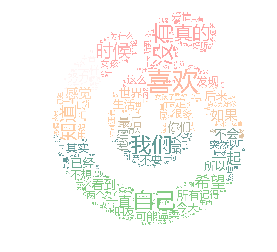

In [14]:
color_mask = np.array(Image.open("netease.png"))
backgroud_Image=np.array(Image.open("color.png"))
image_colors = ImageColorGenerator(backgroud_Image)
font='微软vista雅黑.ttf'
wordcloud=WordCloud(background_color='white',width=1000,height=1000,font_path =font,max_words=200,
                    color_func=image_colors,mask=color_mask,scale=4).generate(word_str)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud.jpg', dpi=1000,bbox_inches='tight', quality=95)
plt.show()

In [19]:
counts = {}
for word in outstr:
    counts[word] = counts.get(word, 0)+1

items = list(counts.items())
items.sort(key=lambda x: x[1], reverse=True)

In [20]:
items_df=pd.DataFrame(items[0:20],columns=['word','count'])
items_df

,word,count
0,喜欢,478
1,没有,306
2,自己,280
3,我们,266
4,真的,187
5,知道,181
6,时候,172
7,希望,140
8,一起,136
9,如果,100


In [25]:
plt.style.use('seaborn-poster')
plt.rcParams['font.sans-serif'] = ['SimHei']

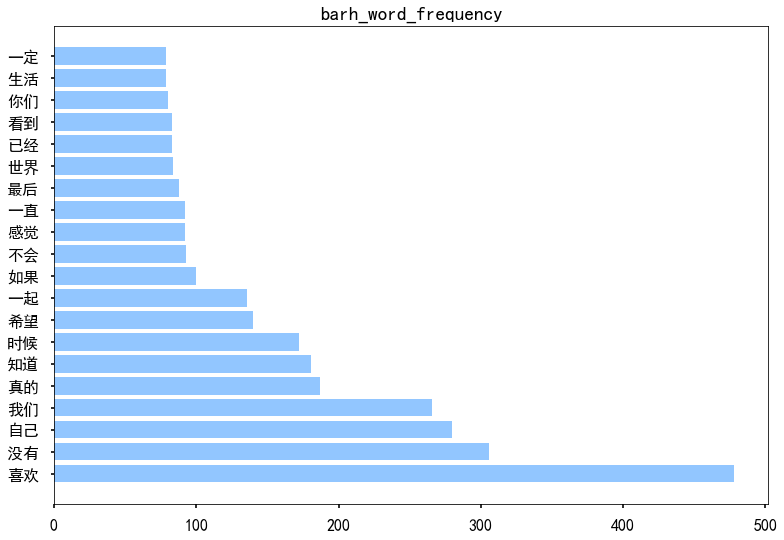

In [26]:
plt.barh(items_df['word'],items_df['count'])
plt.title('barh_word_frequency')
plt.savefig('barh_word_frequency.jpg', dpi=1000,bbox_inches='tight', quality=95)
plt.show()

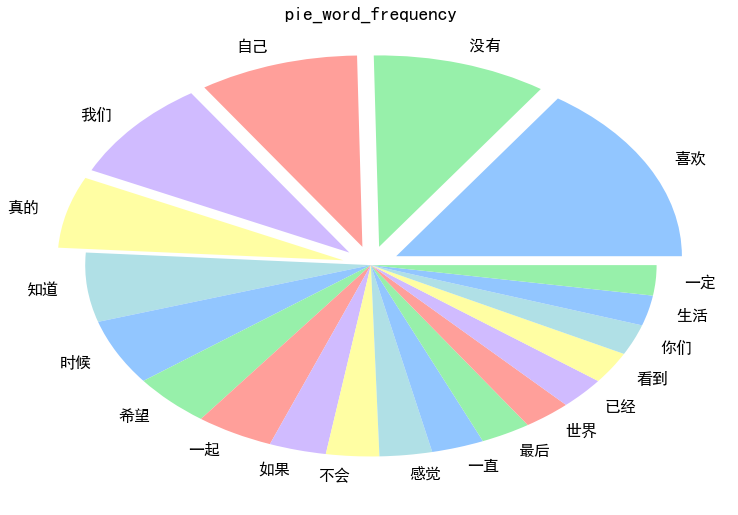

In [27]:
plt.pie(items_df['count'],labels=items_df['word'],explode=(0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,))
plt.title('pie_word_frequency')
plt.savefig('pie_word_frequency.jpg', dpi=1000,bbox_inches='tight', quality=95)
plt.show()